# TASK 1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
path = "C:\\Users\\Purva\\Downloads\\tested (1).csv"
df = pd.read_csv(path, index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
 9   Cabin     91 non-null     object 
 10  Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [7]:
print(f"Data Contains {df.shape[0]} Passenger, {df.shape[1]} Features.")

Data Contains 418 Passenger, 11 Features.


**Categorical vs Numerical**

In [8]:
cat_feats = df.select_dtypes(include=['object']).columns
num_feats = df.select_dtypes(include=['int64','float64']).columns
df[cat_feats].info()
print('-'*50)
df[num_feats].info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      418 non-null    object
 1   Sex       418 non-null    object
 2   Ticket    418 non-null    object
 3   Cabin     91 non-null     object
 4   Embarked  418 non-null    object
dtypes: object(5)
memory usage: 19.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


**Checking Categorical**

In [9]:
print('Classes:')
for cat in df.columns:
    if df[cat].nunique() < 10:
        print(cat, '->', df[cat].nunique())
        print(df[cat].unique())
        print('-'*50)

Classes:
Survived -> 2
[0 1]
--------------------------------------------------
Pclass -> 3
[3 2 1]
--------------------------------------------------
Sex -> 2
['male' 'female']
--------------------------------------------------
SibSp -> 7
[0 1 2 3 4 5 8]
--------------------------------------------------
Parch -> 8
[0 1 3 2 4 6 5 9]
--------------------------------------------------
Embarked -> 3
['Q' 'S' 'C']
--------------------------------------------------


# Exploratory Data Analysis

**Counting of Survived and Not Survived**

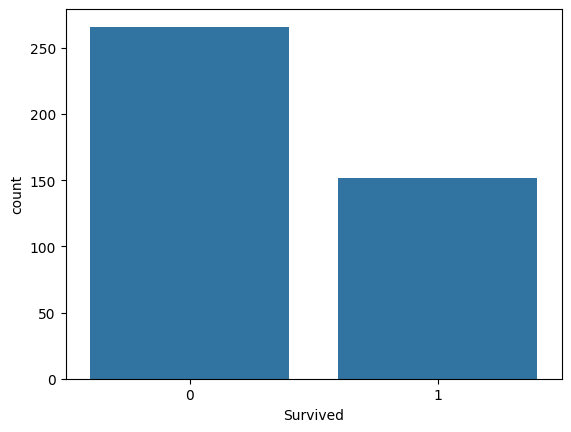

In [10]:
sns.countplot(data=df,x='Survived')
plt.show()

### Did ages affect on Surviving ?
**Distribution of Ages for Survived and Not Survived**

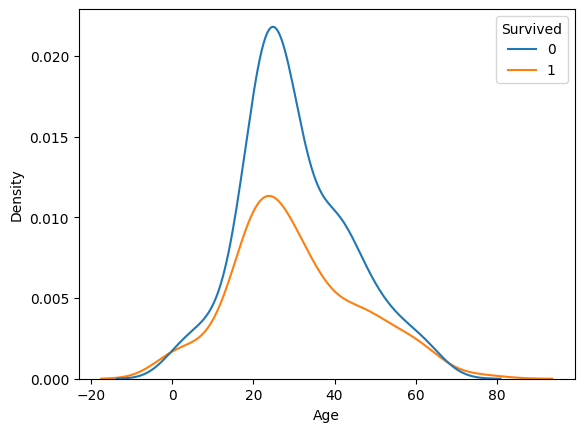

In [11]:
sns.kdeplot(data=df, x='Age', hue='Survived')
plt.show()

### Did more fare affect on Surviving ?
**Distribution of Fares for Survived and Not Survived**

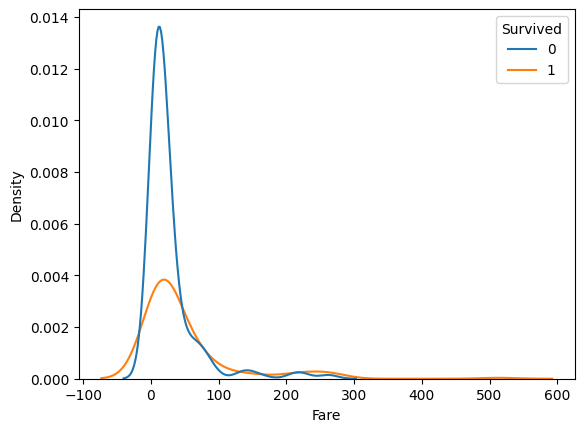

In [12]:
sns.kdeplot(data=df, x='Fare', hue='Survived')
plt.show()

### What is the relation between Age and Fare for Surviving?
Scatter plot of Age to Fare

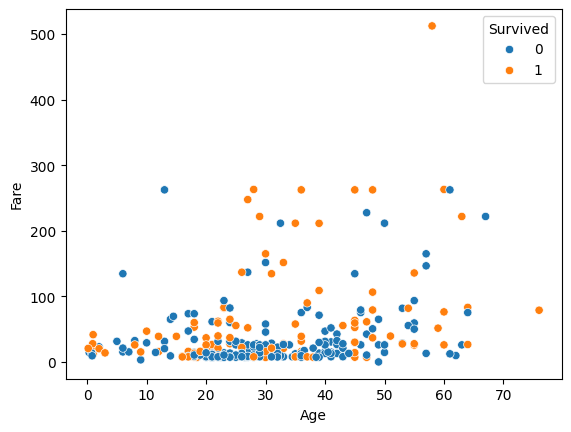

In [13]:
sns.scatterplot(data=df, x='Age', y='Fare',hue='Survived')
plt.show()

### What is the relation between Embarked-Classes and Surviving?

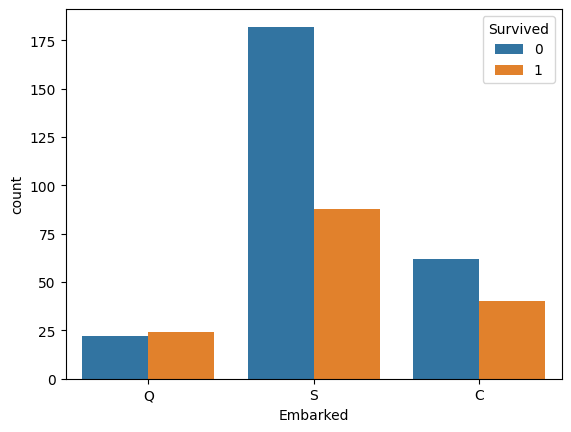

In [14]:
sns.countplot(data=df, x= 'Embarked',hue='Survived')
plt.show()

### How many males and females who Survived?

In [15]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,0,152
male,266,0


**Note: All females survived and all males not survived**

# Data Preparing

In [16]:
rem_feats = ['Name', 'Ticket', 'Cabin']
df = df.drop(rem_feats, axis=1)

**Checking Null Values**

In [17]:
print("Null Values:")
df.isna().sum().sort_values(ascending=False)

Null Values:


Age         86
Fare         1
Pclass       0
Survived     0
Sex          0
SibSp        0
Parch        0
Embarked     0
dtype: int64

**Replacing Null Values With Mean & Encoding Categorical**

In [18]:
df['Age'] = df['Age'].replace({np.nan: df['Age'].mean()})
df['Fare'] = df['Fare'].replace({np.nan: df['Fare'].mean()})
df['Sex'] = df['Sex'].replace({'male': 1, 'female':0})
df = pd.get_dummies(df, dtype=int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,0,3,1,34.5,0,0,7.8292,0,1,0
893,1,3,0,47.0,1,0,7.0000,0,0,1
894,0,2,1,62.0,0,0,9.6875,0,1,0
895,0,3,1,27.0,0,0,8.6625,0,0,1
896,1,3,0,22.0,1,1,12.2875,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['Age'] = std_scaler.fit_transform(df['Age'].values.reshape(-1,1))
df['Fare'] = std_scaler.fit_transform(df['Fare'].values.reshape(-1,1))

# Building ML Models

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
X = df.drop('Survived', axis=1)
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train Base Model [Logistic Regression]

### Model's Performance

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Classification_Report: \n",classification_report(y_test, y_pred_lr))

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Train Other Model [Random Forest]

### Model's Performance

In [23]:
param_grid = {
    'random_state': [42],
    'max_depth': [10, 20],
    'min_samples_split': [2, 3],
    'n_estimators': [200],
    'criterion':['entropy'],
}

RF = RandomForestClassifier()
model = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5).fit(x_train, y_train)

y_pred_rf = model.predict(x_test)

print('Train Score:', model.score(x_train, y_train))
print('Model Score:', model.score(x_test, y_test))

print(model.best_estimator_)

Train Score: 1.0
Model Score: 1.0
RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)


In [24]:
print("Classification_Report: \n",classification_report(y_test, y_pred_rf))

Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



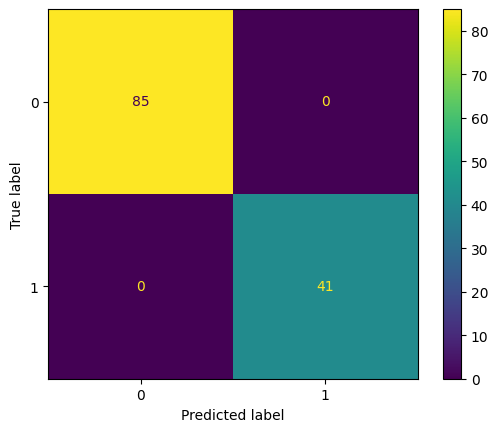

In [25]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()